FIltro AR (ecuación de Yule-Walker)

La ecuación de Yule-Walker es un conjunto de ecuaciones que se utilizan en el análisis de procesos estocásticos, particularmente en el modelado de procesos autorregresivos (AR). Estas ecuaciones se derivan de la relación entre los coeficientes autoregresivos de un modelo AR y las funciones de autocovarianza de la serie temporal.

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

N = 500
n = np.arange(0,N,1.0)

xn = 20 + 0.05*n

ruido = np.random.randn(1,N) #ruido "blanco"
xn_r = xn + ruido

print(xn_r[0, 0:5])

[19.43302378 19.21660112 18.58109263 19.56868576 20.20344564]


Estimación de autocovarianzas de la señal xn_r 

In [98]:
max_lag = 5
autocovarianzas = np.zeros((1, max_lag+1))

for i in range(0, max_lag+1):
    autocovarianzas[0, i] = np.mean( xn_r[0, 0:N-i] * xn_r[0, i:N] )

print(autocovarianzas)

[[1106.49138124 1105.31772719 1105.16542773 1104.92324358 1104.78575218
  1104.594155  ]]


Construir matriz de autocovarianzas R

In [99]:
R = np.zeros((max_lag+1, max_lag+1))

for i in range(0, max_lag+1):
    for j in range(0,max_lag+1):
        R[i,j] = autocovarianzas[0, abs(i-j)]

Resolver la ecuación de Yule-Walker para obtener los coeficientes AR

In [100]:
gamma = autocovarianzas[0,1:max_lag+1]
print(gamma)
phi_est = np.matmul( np.linalg.inv(R[1:max_lag+1 , 1:max_lag+1]) , gamma )

[1105.31772719 1105.16542773 1104.92324358 1104.78575218 1104.594155  ]


Filtrando la señal

In [103]:
yn = signal.lfilter(np.append(0 , phi_est),1,xn_r)

Generando gráficos

Text(0.5, 1.0, 'Señal filtrada - AR-YW')

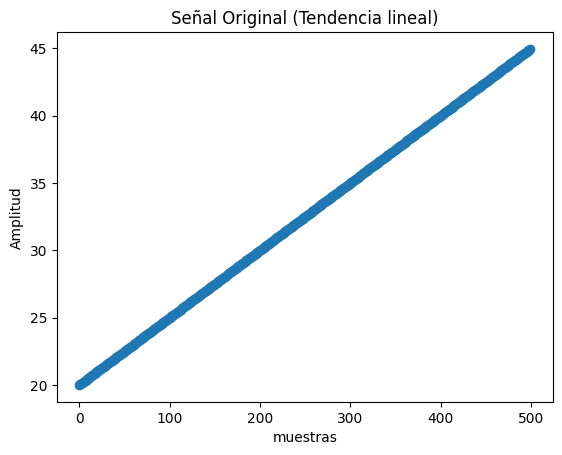

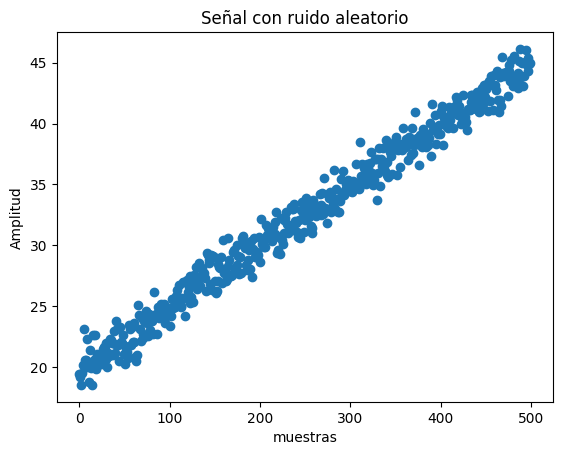

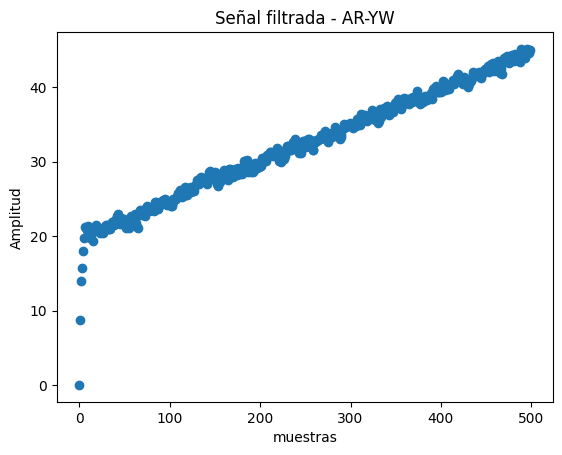

In [108]:
#señal
plt.figure(1)
plt.scatter(n,xn)
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.title('Señal Original (Tendencia lineal)')

plt.figure(2)
plt.scatter(n,xn_r)
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.title('Señal con ruido aleatorio')

plt.figure(3)
plt.scatter(n,yn)
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.title('Señal filtrada - AR-YW')
